#### Load data to drive

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [19]:
#Load data
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

#Drop features we are not going to use
train = train.drop(['Name','SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)
test = test.drop(['Name','SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)

#Look at the first 30 rows of our training data
train.head(30)

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0
5,6,0,3,male,NaN
6,7,0,1,male,54.0
7,8,0,3,male,2.0
8,9,1,3,female,27.0
9,10,1,2,female,14.0


#### Prepare the data to be read by our algorithm

In [5]:
#Convert ['male','female'] to [1,0] so that our decision tree can be built
for df in [train,test]:
    df['Sex_binary']=df['Sex'].map({'male':1,'female':0})
    
#Fill in missing age values with 0 (presuming they are a baby if they do not have a listed age)
train['Age'] = train['Age'].fillna(0)
test['Age'] = test['Age'].fillna(0)

#Select feature column names and target variable we are going to use for training
features = ['Pclass','Age','Sex_binary']
target = 'Survived'

#Look at the first 30 rows (we have over 800 total rows) of our training data.; 
#This is input which our classifier will use as an input.
train[features].head(30)

,Pclass,Age,Sex_binary
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
5,3,0.0,1
6,1,54.0,1
7,3,2.0,1
8,3,27.0,0
9,2,14.0,0


In [7]:
#Display first 30 target variables
train[target].head(30).values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0])

### 2. Create and fit the decision tree

In [8]:

from sklearn.tree import DecisionTreeClassifier


#Create classifier object with default hyperparameters
clf = DecisionTreeClassifier()  

#Fit our classifier using the training features and the training target values
clf.fit(train[features],train[target]) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 3. Make Predictions

In [10]:
#Make predictions using the features from the test data set
predictions = clf.predict(test[features])

#Display our predictions - they are either 0 or 1 for each training instance 
#depending on whether our algorithm believes the person survived or not.
predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### 4. Create csv to upload to Kaggle

In [11]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

#Visualize the first 10 rows
submission.head(30)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [12]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic.csv


In [13]:


# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [15]:
download('Titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
df = pd.read_csv('Titanic.csv')
df.head(1300)



,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [17]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Class of passengers Died')

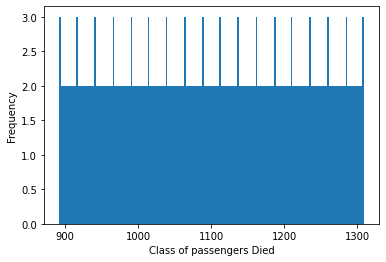

In [18]:
df['PassengerId'].plot(kind='hist', bins=200)
plt.xlabel('Class of passengers Died')